In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Setting up data
___

Our goal here is to merge two datasets. One for deaths per county, and our covid vaccine hesitancy dataset.

In [2]:
covid_data = pd.read_csv("data/Vaccine_Hesitancy.csv")
# covid_data.isnull().sum() # Check for missing values
deaths = pd.read_csv("data/COVID_Deaths.csv")
#deaths.isnull().sum() # Check for missing values

# make a new column (percentage of deaths involving covid-19)
deaths["Percent deaths involving COVID"] = deaths["Deaths involving COVID-19"] / deaths["Deaths from All Causes"]

In [3]:
# combine deaths and hesitancy horizontally, but lining up based on county
hesitancy_deaths_data = deaths.merge(covid_data, left_on="FIPS County Code", 
                      right_on="FIPS_Code", how = 'inner')

In [4]:
# make a new column adding up the percentage of people who are hesitant
hesitancy_deaths_data['Percent Hesitant'] = covid_data['Estimated_hesitant'] + covid_data['Estimated_hesitant_or_unsure'] + covid_data['Estimated_strongly_hesitant']

In [5]:
hesitancy_deaths_data.head(2)

,State_x,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Percent deaths involving COVID,FIPS_Code,County_Name,State_y,...,Percent_vaccinated,Percent_Hispanic,Percent_Native,Percent_Asian,Percent_Black,Percent_Hawaiian,Percent_White,Geographical_Point,State_Code,Percent Hesitant
0,AK,Anchorage Municipality,2020,Medium metro,204.0,3143.0,0.064906,2020,"Anchorage Municipality, Alaska",ALASKA,...,0.542,0.0917,0.0737,0.0943,0.0528,0.0241,0.5790,(-151.631889 63.631126),AK,0.5589
1,AK,Bethel Census Area,2050,Noncore,17.0,154.0,0.110390,2050,"Bethel Census Area, Alaska",ALASKA,...,0.689,0.0260,0.8250,0.0108,0.0074,0.0022,0.0973,(-151.631889 63.631126),AK,0.5501


We are going to add a new collumn below to use the new total hesitant values that way we can group them up into categories that we can later explore with categorization models. This list comprehension is a bit long but it works just like a for loop, which you will see an example of lower in the code.

In [6]:
total_hesitancy = hesitancy_deaths_data['Percent Hesitant']
# extreme risk  > 0.6
# high concern  0.4 - 0.6 
# low risk < 0.4
# no risk -> needed to use list comprehension code, but this category can never be met
hesitancy_deaths_data["hesitancy_categories"] = ["extreme risk" if value >= 0.5 else "high risk" if value >= 0.4 else "low risk" if value < 0.4 else "no risk" for value in total_hesitancy]

In [7]:
## We can use this piece of code to filter counties with a high risk for lack in vaccinations 
hesitancy_deaths_data.loc[hesitancy_deaths_data["hesitancy_categories"] == "high risk"].head(3)

,State_x,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Percent deaths involving COVID,FIPS_Code,County_Name,State_y,...,Percent_Hispanic,Percent_Native,Percent_Asian,Percent_Black,Percent_Hawaiian,Percent_White,Geographical_Point,State_Code,Percent Hesitant,hesitancy_categories
12,AL,Chambers County,1017,Micropolitan,39.0,570.0,0.068421,1017,"Chambers County, Alabama",ALABAMA,...,0.0238,0.0033,0.0112,0.3956,0.0,0.5555,(-86.844516 32.756889),AL,0.4839,high risk
14,AL,Chilton County,1021,Large fringe metro,32.0,622.0,0.051447,1021,"Chilton County, Alabama",ALABAMA,...,0.0785,0.0009,0.0044,0.0917,0.0,0.8013,(-86.844516 32.756889),AL,0.4597,high risk
19,AL,Coffee County,1031,Micropolitan,87.0,854.0,0.101874,1031,"Coffee County, Alabama",ALABAMA,...,0.0728,0.0116,0.0144,0.1680,0.0,0.7015,(-86.844516 32.756889),AL,0.4695,high risk


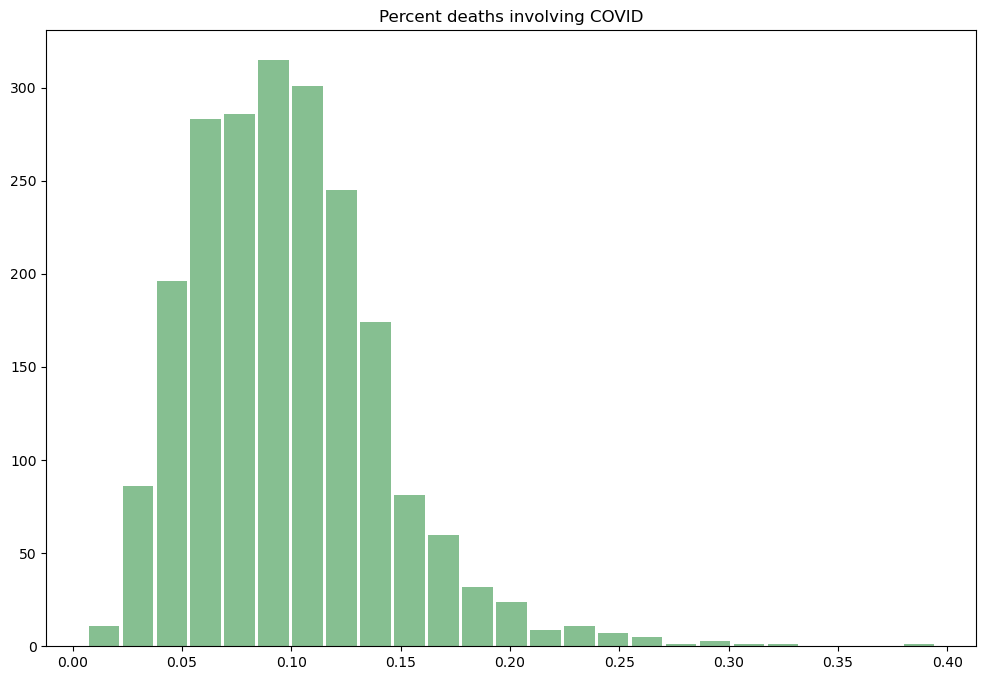

In [8]:
ax = hesitancy_deaths_data.hist(column='Percent deaths involving COVID', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [9]:
# 0 - 0.06 --> low
# 0.06 - 0.09 --> medium
# 0.09 - 0.13 --> medium high
# 0.13 - up --> high

death_categories = []
for percent in hesitancy_deaths_data["Percent deaths involving COVID"]:
    if percent >= 0.1:
        death_categories.append("high percentage")
    elif percent >= 0.05: 
        death_categories.append("medium percentage")
    else: 
        death_categories.append("low percentage")

hesitancy_deaths_data["death_categories"] = death_categories
hesitancy_deaths_data

,State_x,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Percent deaths involving COVID,FIPS_Code,County_Name,State_y,...,Percent_Native,Percent_Asian,Percent_Black,Percent_Hawaiian,Percent_White,Geographical_Point,State_Code,Percent Hesitant,hesitancy_categories,death_categories
0,AK,Anchorage Municipality,2020,Medium metro,204.0,3143.0,0.064906,2020,"Anchorage Municipality, Alaska",ALASKA,...,0.0737,0.0943,0.0528,0.0241,0.5790,(-151.631889 63.631126),AK,0.5589,extreme risk,medium percentage
1,AK,Bethel Census Area,2050,Noncore,17.0,154.0,0.110390,2050,"Bethel Census Area, Alaska",ALASKA,...,0.8250,0.0108,0.0074,0.0022,0.0973,(-151.631889 63.631126),AK,0.5501,extreme risk,high percentage
2,AK,Fairbanks North Star Borough,2090,Small metro,47.0,741.0,0.063428,2090,"Fairbanks North Star Borough, Alaska",ALASKA,...,0.0727,0.0309,0.0428,0.0051,0.6993,(-151.631889 63.631126),AK,0.5429,extreme risk,medium percentage
3,AK,Kenai Peninsula Borough,2122,Noncore,14.0,501.0,0.027944,2122,"Kenai Peninsula Borough, Alaska",ALASKA,...,0.0772,0.0157,0.0054,0.0033,0.7992,(-151.631889 63.631126),AK,0.5429,extreme risk,low percentage
4,AK,Matanuska-Susitna Borough,2170,Medium metro,47.0,873.0,0.053837,2170,"Matanuska-Susitna Borough, Alaska",ALASKA,...,0.0604,0.0137,0.0115,0.0022,0.7922,(-151.631889 63.631126),AK,0.5497,extreme risk,medium percentage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,WY,Natrona County,56025,Small metro,190.0,1607.0,0.118233,56025,"Natrona County, Wyoming",WYOMING,...,0.0098,0.0058,0.0108,0.0017,0.8669,(-107.55145 42.999627),WY,0.5706,extreme risk,high percentage
2129,WY,Park County,56029,Noncore,28.0,469.0,0.059701,56029,"Park County, Wyoming",WYOMING,...,0.0046,0.0053,0.0067,0.0000,0.9105,(-107.55145 42.999627),WY,0.3391,low risk,medium percentage
2130,WY,Sheridan County,56033,Micropolitan,33.0,489.0,0.067485,56033,"Sheridan County, Wyoming",WYOMING,...,0.0179,0.0067,0.0022,0.0000,0.9168,(-107.55145 42.999627),WY,0.6211,extreme risk,medium percentage
2131,WY,Sweetwater County,56037,Micropolitan,40.0,516.0,0.077519,56037,"Sweetwater County, Wyoming",WYOMING,...,0.0102,0.0074,0.0112,0.0003,0.7956,(-107.55145 42.999627),WY,0.4744,high risk,medium percentage


# Model training

In [10]:
from sklearn.model_selection import train_test_split
from joblib import dump, load

## Linear regression training
___
This test is a linear regression model between:

input: **Percent hesitant**

output: **Percent of COVID related deaths**

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
X = hesitancy_deaths_data["Percent Hesitant"]
y = hesitancy_deaths_data["Percent deaths involving COVID"]

In [45]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
#reshape data for regression (needs to be a 1D array)
X_train= X_train.values.reshape(-1, 1)
y_train= y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [47]:
# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

### Results

Coefficients: 
 [[-0.01085865]]
Mean squared error: 0.0018
Coefficient of determination: 0.0016


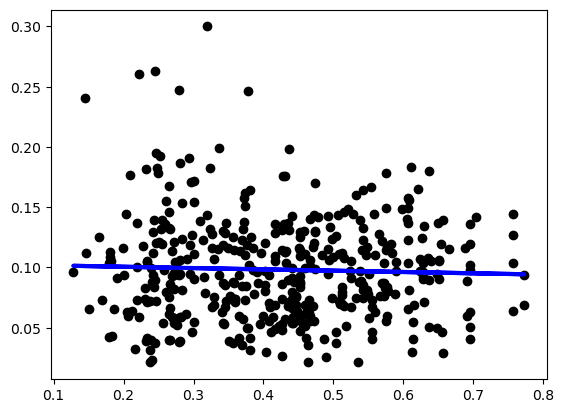

In [48]:
# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print('Mean squared error: {0:.4f}'.format(mean_squared_error(y_test, y_pred, squared=True)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f' %r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

As we predicted, creating a linear model for is not very effective in our case, prehaps we could look at a linear regression model or like linear regression for multiple variables, however, from this point on we decided to look at decision trees to predict from the categories we created

In [50]:
#Save the model
dump(model, 'model/linear_reg_model.joblib')

['model/linear_reg_model.joblib']

## Decision Trees

In [60]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.metrics import accuracy_score
from sklearn import tree 
##
from itertools import repeat
import scipy.stats

# visualizing tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
from dtreeviz.trees import dtreeviz

We start off by separating out input and output data. Here we are trying to predict the death_categories we created above that highlight a range of percentages of death caused by COVID. The data that we use for our input are a combination of collumns highlighted by the list "feature_cols"

In [61]:
# independent variables (should we use SVI and CVAC)
feature_cols = ['CVAC_vloc', 'SVI', 'Percent Hesitant', 'Percent_Native', 'Percent_Asian', 'Percent_Black', 'Percent_Hawaiian', 'Percent_White']
X = hesitancy_deaths_data[feature_cols]
y = hesitancy_deaths_data['death_categories']

In [62]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [63]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

Here we can see how accurate our trained model is by using it to predict the values in our test data, data is has not been exposed to before:

Accuracy: 0.5011709601873536


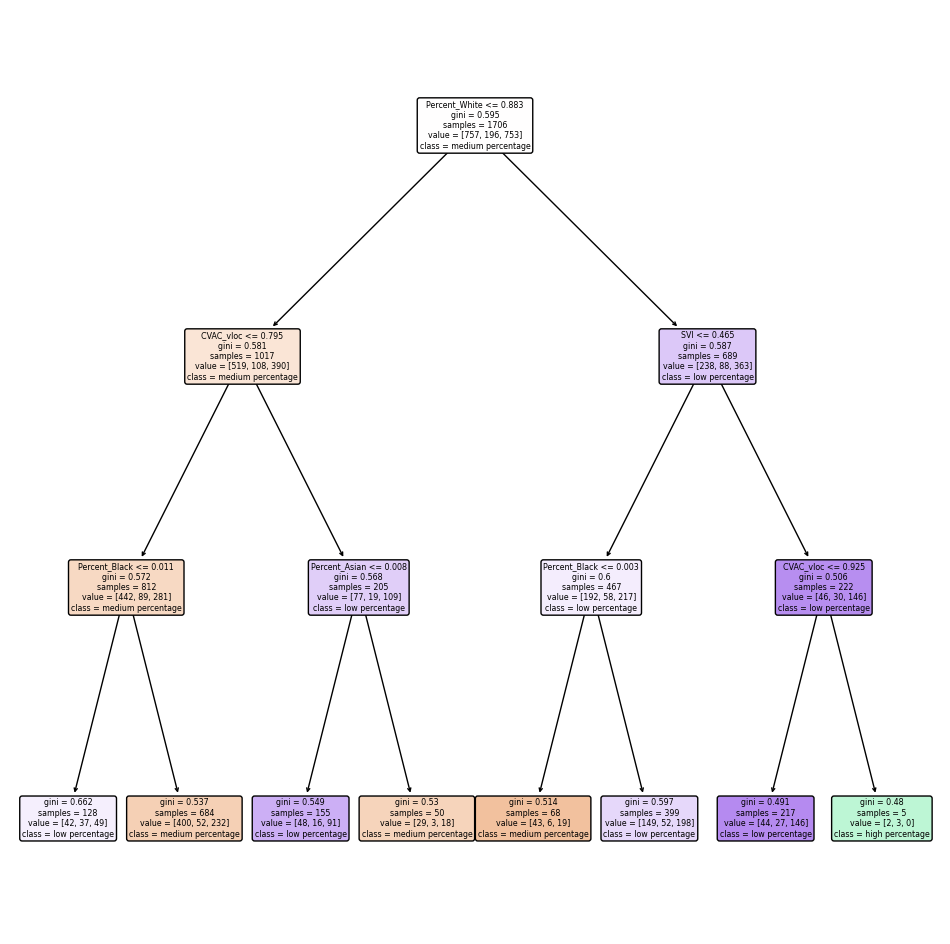

In [64]:
# Model Accuracy, how often is the classifier correct?
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# plot tree
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(clf,
               feature_names = feature_cols, 
               class_names=y.unique(),
               rounded=True, 
               filled = True);
plt.show()

In [65]:
p_data = y.value_counts(normalize=True)           # counts occurrence of each value
entropy = scipy.stats.entropy(p_data)  # get entropy from counts

In [66]:
avg_score = 0.0
ntimes = 30

for i in repeat(None, ntimes):

    # train model with 80% of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # prediction
    model = DecisionTreeClassifier(criterion='entropy')
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)

    # compute model accuracy
    avg_score += accuracy_score(y_test, predictions)

avg_score /= ntimes

In [67]:
print('entropy: %.3f'% entropy)
print('average accuracy score: %.3f' % avg_score)

entropy: 0.968
average accuracy score: 0.459


In [72]:
# save the model
dump(clf, 'model/decision_tree_model.joblib')

# We can also save our decision tree graph:
tree.export_graphviz(clf, out_file="visualizations/decision_tree_graph.dot",
                    feature_names=feature_cols,
                    class_names=sorted(y.unique()),
                    label="all",
                    rounded="True",
                    filled="True")

For completion- The way to use a saved model:

In [53]:
clf = load('model/decision_tree_model.joblib')